# Ch 6 (?)

# IMPORTS

In [1]:
import random
import pickle
import glob

import random
import ast

import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

from collections import Counter

from time import time
from time import sleep
from time import strftime
from time import localtime
from tqdm import tqdm

from datetime import date, timedelta, datetime

# from mydecorators import logger, stopwatch





In [2]:
def streak_counter(llist):
  result_dict = {
    ### 0 for Loss
    0: [],
    ### 1 for Win 
    1: []    
  }

  streak_size = 1

  for i in range(len(llist)):
    if i != len(llist)-1:
      if llist[i] != llist[i+1]:
        result_dict[llist[i]].append(streak_size)
        streak_size = 1

      elif llist[i] == llist[i+1]:
        streak_size += 1
    else:
      result_dict[llist[i]].append(streak_size)

  return result_dict


In [3]:
### function for calulating the average of number of consecutive results
def avg_cal(ddict):
  return np.mean(ddict[0]), np.mean(ddict[1])



In [4]:
### streak generator
#### using list.extend

def streak_gen(streak_size, result_size):    ### number of games
  result_streak = []

  n_games = result_size

  n_games_played = 0

  while n_games_played <= n_games:

    streak_size = streak_size
    streak = random.choices(['WS','LS'], weights=(0.5,0.5))[0]

    if streak == 'WS':
      wr = 0.85
      lr = 0.15
      # print(lr,wr)
      
      streak_games = random.choices([0,1], weights=(lr, wr), k=streak_size)
      result_streak.extend(streak_games)

    else:
      wr = 0.15
      lr = 0.85
      # print(lr,wr)
      streak_games = random.choices([0,1], weights=(lr, wr), k=streak_size)
      result_streak.extend(streak_games)

    n_games_played += streak_size


  return result_streak[:result_size]

In [5]:
# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i+1, y[i] ,y[i], fontsize=10)

# Generate GAME HISTORIES

## PerfectMM - One Million Games (to use as POPULATION ?)

In [6]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### set random seed
random.seed(135)
np.random.seed(135)

# prob_list = np.linspace(0.49,0.51, 100)
prob_list = [0.5]

### when each game is between 49 ~ 51 % (independent)
#### 3000 games per player, 1000 players, totalling 3 million games played

avg_list_0 = []
avg_list_1 = []

one_million_games = []

# number_of_players = 1000
# games_per_player = 3000
number_of_players = 1
games_per_player = 1000000

for _ in range(number_of_players):
    result_n = []

    for _ in range(games_per_player):
        prob_of_0 = random.choice(prob_list)
        prob_of_1 = 1 - prob_of_0
        
        one_game = np.random.choice([0,1], 1, p = [prob_of_0, prob_of_1])[0]
        result_n.append(one_game)
    
    streak_counter_result = streak_counter(result_n)
    
    ### add to one_million_games (3000 players)
    one_million_games.append(result_n)
    # print(streak_counter_result)

    avg_cal_result = avg_cal(streak_counter_result)
    # print(avg_cal_result)
    avg_list_0.append(avg_cal_result[0])
    avg_list_1.append(avg_cal_result[1])
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-04-02 15:27:13



----------------------------------------------------
done in 7.425s.
2024-04-02 15:27:21


In [7]:
# one_million_games[0][:10]

In [8]:
### one_million_games[0][:10]

# perfectmm_counted = streak_counter(one_million_games[0][:])
perfectmm_counted = streak_counter(one_million_games[0])

In [9]:
print('MAX MIN of Losing Streaks')
print(np.max(perfectmm_counted[0]))
print(np.min(perfectmm_counted[0]))

print('MAX MIN of Win Streaks')
print(np.max(perfectmm_counted[1]))
print(np.min(perfectmm_counted[1]))

print('Averages')
print(f'L: {np.mean(perfectmm_counted[0])}')
print(f'W: {np.mean(perfectmm_counted[1])}')

print('Standard Deviations')
print(f'L: {np.std(perfectmm_counted[0])}')
print(f'W: {np.std(perfectmm_counted[1])}')

MAX MIN of Losing Streaks
17
1
MAX MIN of Win Streaks
20
1
Averages
L: 2.003923721884669
W: 2.0039557691305725
Standard Deviations
L: 1.4168229150676865
W: 1.419380547217041


In [10]:
print(f'sum of L streak : {np.sum(perfectmm_counted[0])}')
print(f'sum of W streak : {np.sum(perfectmm_counted[1])}')

sum of L streak : 499995
sum of W streak : 500005


In [11]:
# print(np.max(streak_counter(one_million_games[0][:])[0]))
# print(np.min(streak_counter(one_million_games[0][:])[0]))

# print(np.max(streak_counter(one_million_games[0][:])[1]))
# print(np.min(streak_counter(one_million_games[0][:])[1]))



# print(np.mean(streak_counter(one_million_games[0])[0]))
# print(np.mean(streak_counter(one_million_games[0])[1]))

# print(np.std(streak_counter(one_million_games[0])[0]))
# print(np.std(streak_counter(one_million_games[0])[1]))

In [12]:
# perfectmm_counted[0]

In [13]:
streaks = []

streaks_0 = list(perfectmm_counted[0])
streaks_0 = [x*(-1) for x in streaks_0]
print(streaks_0[:20])

print(np.mean(streaks_0))
print(np.std(streaks_0))

streaks_1 = list(perfectmm_counted[1])
print(streaks_1[:20])

print(np.mean(streaks_1))
print(np.std(streaks_1))


print('----')
streaks.extend(streaks_0)
streaks.extend(streaks_1)

print(np.mean(streaks))
print(np.std(streaks))



# llist.extend(list(perfectmm_counted[1]))
# print(len(llist))
# print(llist[:30])

# print(np.mean(llist))
# print(np.std(llist))
# print(np.sum(llist))

[-2, -1, -1, -5, -1, -3, -1, -1, -2, -2, -2, -1, -1, -2, -1, -1, -1, -1, -1, -4]
-2.003923721884669
1.4168229150676865
[1, 2, 2, 1, 3, 1, 3, 4, 2, 6, 1, 1, 2, 4, 1, 5, 5, 1, 1, 7]
2.0039557691305725
1.419380547217041
----
2.003939745539731e-05
2.4549518663543686


## NearPerfectMM - One Million Games

In [14]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### set random seed
random.seed(2237)
np.random.seed(2237)

prob_list = np.linspace(0.49,0.51, 100)

### when each game is between 49 ~ 51 % (independent)
#### 3000 games per player, 1000 players, totalling 3 million games played

avg_list_0 = []
avg_list_1 = []

nearperfect_all_records = []

number_of_players = 1
games_per_player = 1000000


for _ in range(number_of_players):
    result_n = []

    for _ in range(games_per_player):
        prob_of_0 = random.choice(prob_list)
        prob_of_1 = 1 - prob_of_0

        one_game = np.random.choice([0,1], 1, p = [prob_of_0, prob_of_1])[0]
        result_n.append(one_game)
    
    streak_counter_result = streak_counter(result_n)
    
    ### add to nearperfect_all_records (3000 players)
    nearperfect_all_records.append(result_n)
    # print(streak_counter_result)

    avg_cal_result = avg_cal(streak_counter_result)
    # print(avg_cal_result)
    avg_list_0.append(avg_cal_result[0])
    avg_list_1.append(avg_cal_result[1])
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-04-02 15:27:21



----------------------------------------------------
done in 7.465s.
2024-04-02 15:27:28


In [15]:
print(np.mean(avg_list_0))
print(np.mean(avg_list_1))


2.0011037704157535
1.9980644026042582


In [16]:
# nearperfectmm_counted = streak_counter(nearperfect_all_records[0][:])
nearperfectmm_counted = streak_counter(nearperfect_all_records[0])

In [17]:
print('MAX MIN of Losing Streaks')
print(np.max(nearperfectmm_counted[0]))
print(np.min(nearperfectmm_counted[0]))

print('MAX MIN of Win Streaks')
print(np.max(nearperfectmm_counted[1]))
print(np.min(nearperfectmm_counted[1]))

print('Averages')
print(f'L: {np.mean(nearperfectmm_counted[0])}')
print(f'W: {np.mean(nearperfectmm_counted[1])}')

print('Standard Deviations')
print(f'L: {np.std(nearperfectmm_counted[0])}')
print(f'W: {np.std(nearperfectmm_counted[1])}')

MAX MIN of Losing Streaks
20
1
MAX MIN of Win Streaks
23
1
Averages
L: 2.0011037704157535
W: 1.9980644026042582
Standard Deviations
L: 1.4167982423222778
W: 1.4148511856294026


In [18]:
print(f'sum of L streak : {np.sum(nearperfectmm_counted[0])}')
print(f'sum of W streak : {np.sum(nearperfectmm_counted[1])}')

sum of L streak : 500380
sum of W streak : 499620


In [19]:
# ### streak_all_records = million games from StreakMM

# print(np.max(streak_counter(nearperfect_all_records[0][:])[0]))
# print(np.min(streak_counter(nearperfect_all_records[0][:])[0]))

# print(np.max(streak_counter(nearperfect_all_records[0][:])[1]))
# print(np.min(streak_counter(nearperfect_all_records[0][:])[1]))



# print(np.mean(streak_counter(nearperfect_all_records[0])[0]))
# print(np.mean(streak_counter(nearperfect_all_records[0])[1]))

# print(np.std(streak_counter(nearperfect_all_records[0])[0]))
# print(np.std(streak_counter(nearperfect_all_records[0])[1]))

In [20]:
streaks = []

streaks_0 = list(nearperfectmm_counted[0])
streaks_0 = [x*(-1) for x in streaks_0]
print(streaks_0[:20])

print(np.mean(streaks_0))
print(np.std(streaks_0))

streaks_1 = list(nearperfectmm_counted[1])
print(streaks_1[:20])

print(np.mean(streaks_1))
print(np.std(streaks_1))


print('----')
streaks.extend(streaks_0)
streaks.extend(streaks_1)

print(np.mean(streaks))
print(np.std(streaks))



# llist.extend(list(perfectmm_counted[1]))
# print(len(llist))
# print(llist[:30])

# print(np.mean(llist))
# print(np.std(llist))
# print(np.sum(llist))

[-1, -1, -1, -3, -1, -2, -2, -2, -2, -2, -2, -1, -2, -1, -4, -1, -1, -3, -2, -1]
-2.0011037704157535
1.4167982423222778
[3, 2, 1, 2, 2, 2, 4, 1, 4, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1]
1.9980644026042582
1.4148511856294026
----
-0.0015196839057476045
2.450081036922303


## StreakMM - One Million Games

In [21]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### set random seed
random.seed(1576)
np.random.seed(1576)

### when streaks exist
### ws:ls = 50:50
### 85% of win/loss depending on the streak

avg_list_0 = []
avg_list_1 = []

streak_all_records = []
for _ in range(1):
    result_n = streak_gen(6, 1_000_000)
    
    # streak_all_records.append(pd.Series(result_n))
    streak_all_records.append(result_n)
    
    streak_counter_result = streak_counter(result_n)
    # print(streak_counter_result)

    avg_cal_result = avg_cal(streak_counter_result)
    # print(avg_cal_result)
    avg_list_0.append(avg_cal_result[0])
    avg_list_1.append(avg_cal_result[1])
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-04-02 15:27:28



----------------------------------------------------
done in 0.283s.
2024-04-02 15:27:29


In [22]:
avg_cal_result


(3.3715100600834003, 3.3870505542038387)

In [23]:
print(np.mean(avg_list_0))
print(np.mean(avg_list_1))


3.3715100600834003
3.3870505542038387


In [24]:
# streakmm_counted = streak_counter(streak_all_records[0][:])
streakmm_counted = streak_counter(streak_all_records[0])

In [25]:
print('MAX MIN of Losing Streaks')
print(np.max(streakmm_counted[0]))
print(np.min(streakmm_counted[0]))

print('MAX MIN of Win Streaks')
print(np.max(streakmm_counted[1]))
print(np.min(streakmm_counted[1]))

print('Averages')
print(f'L: {np.mean(streakmm_counted[0])}')
print(f'W: {np.mean(streakmm_counted[1])}')

print('Standard Deviations')
print(f'L: {np.std(streakmm_counted[0])}')
print(f'W: {np.std(streakmm_counted[1])}')

MAX MIN of Losing Streaks
52
1
MAX MIN of Win Streaks
39
1
Averages
L: 3.3715100600834003
W: 3.3870505542038387
Standard Deviations
L: 3.400960275967006
W: 3.4216191520092782


In [26]:
print(f'sum of L streak : {np.sum(streakmm_counted[0])}')
print(f'sum of W streak : {np.sum(streakmm_counted[1])}')

sum of L streak : 498852
sum of W streak : 501148


In [27]:
# ### streak_all_records = million games from StreakMM

# print(np.max(streak_counter(streak_all_records[0][:])[0]))
# print(np.min(streak_counter(streak_all_records[0][:])[0]))

# print(np.max(streak_counter(streak_all_records[0][:])[1]))
# print(np.min(streak_counter(streak_all_records[0][:])[1]))



# print(np.mean(streak_counter(streak_all_records[0])[0]))
# print(np.mean(streak_counter(streak_all_records[0])[1]))

# print(np.std(streak_counter(streak_all_records[0])[0]))
# print(np.std(streak_counter(streak_all_records[0])[1]))

In [28]:
streaks = []

streaks_0 = list(streakmm_counted[0])
streaks_0 = [x*(-1) for x in streaks_0]
print(streaks_0[:20])

print(np.mean(streaks_0))
print(np.std(streaks_0))

streaks_1 = list(streakmm_counted[1])
print(streaks_1[:20])

print(np.mean(streaks_1))
print(np.std(streaks_1))


print('----')
streaks.extend(streaks_0)
streaks.extend(streaks_1)

print(np.mean(streaks))
print(np.std(streaks))



# llist.extend(list(perfectmm_counted[1]))
# print(len(llist))
# print(llist[:30])

# print(np.mean(llist))
# print(np.std(llist))
# print(np.sum(llist))

[-6, -3, -7, -1, -1, -5, -25, -1, -5, -6, -1, -2, -1, -1, -6, -7, -1, -3, -1, -1]
-3.3715100600834003
3.400960275967006
[1, 2, 4, 2, 2, 1, 4, 1, 1, 7, 4, 1, 1, 6, 5, 1, 1, 4, 3, 3]
3.3870505542038387
3.4216191520092782
----
0.007758827524913744
4.8017225415490215


In [29]:
(0-0.007758827524913744)/np.sqrt(2.4549518663543686**2 + 4.8017225415490215**2)

### -0.0014349967115323884

-0.0014387125994693578

In [30]:
2.4549518663543686**2/4.8017225415490215**2

0.26139172797973703

In [31]:
### f-test
4.8017225415490215**2/2.4549518663543686**2

3.825675769194653

### Counter

In [32]:
print(f'L streak counted : {Counter(perfectmm_counted[0])}')
print(f'L streak counted : {Counter(perfectmm_counted[1])}')

L streak counted : Counter({1: 124404, 2: 62676, 3: 30936, 4: 15672, 5: 7940, 6: 3955, 7: 2003, 8: 979, 9: 461, 10: 248, 11: 111, 12: 55, 13: 28, 14: 24, 15: 9, 16: 4, 17: 3})
L streak counted : Counter({1: 124601, 2: 62144, 3: 31575, 4: 15466, 5: 7824, 6: 3812, 7: 2093, 8: 1013, 9: 523, 10: 228, 11: 104, 12: 58, 13: 39, 14: 12, 15: 6, 16: 6, 20: 2, 17: 2, 18: 1})


In [33]:
print(f'L streak counted : {Counter(nearperfectmm_counted[0])}')
print(f'L streak counted : {Counter(nearperfectmm_counted[1])}')

L streak counted : Counter({1: 125225, 2: 62204, 3: 31120, 4: 15849, 5: 7717, 6: 4078, 7: 1916, 8: 961, 9: 476, 10: 254, 11: 117, 12: 77, 13: 34, 14: 10, 15: 8, 16: 4, 17: 1, 20: 1})
L streak counted : Counter({1: 125231, 2: 62650, 3: 30970, 4: 15522, 5: 7842, 6: 3902, 7: 1946, 8: 1003, 9: 493, 10: 274, 11: 107, 12: 56, 13: 21, 14: 20, 15: 8, 16: 3, 18: 2, 23: 1, 17: 1})


In [34]:
print(f'L streak counted : {Counter(streakmm_counted[0])}')
print(f'L streak counted : {Counter(streakmm_counted[1])}')

L streak counted : Counter({1: 63848, 2: 21473, 3: 13441, 6: 10454, 4: 10201, 5: 8198, 7: 5306, 8: 3398, 9: 2420, 12: 1995, 10: 1896, 11: 1586, 13: 981, 14: 590, 15: 467, 18: 377, 16: 316, 17: 300, 19: 205, 20: 103, 21: 82, 22: 76, 24: 63, 23: 56, 25: 37, 27: 15, 29: 14, 30: 13, 28: 13, 26: 12, 33: 7, 31: 6, 32: 3, 36: 2, 34: 2, 35: 2, 40: 1, 39: 1, 52: 1})
L streak counted : Counter({1: 63688, 2: 21255, 3: 13532, 6: 10441, 4: 10327, 5: 8261, 7: 5374, 8: 3301, 9: 2492, 12: 1983, 10: 1874, 11: 1520, 13: 1021, 14: 644, 15: 480, 18: 392, 16: 358, 17: 270, 19: 198, 20: 128, 21: 79, 22: 77, 24: 71, 23: 60, 25: 36, 26: 30, 27: 16, 30: 10, 31: 8, 29: 7, 28: 6, 34: 5, 36: 5, 32: 4, 37: 3, 33: 2, 38: 1, 39: 1})


In [35]:
perfect_dict_0 = Counter(perfectmm_counted[0])
perfect_dict_1 = Counter(perfectmm_counted[1])
nearperfect_dict_0 = Counter(nearperfectmm_counted[0])
nearperfect_dict_1 = Counter(nearperfectmm_counted[1])
streak_dict_0 = Counter(streakmm_counted[0])
streak_dict_1 = Counter(streakmm_counted[1])


# Distribution Plots (HISTOGRAMS)

## PerfectMM

### Losing Streaks

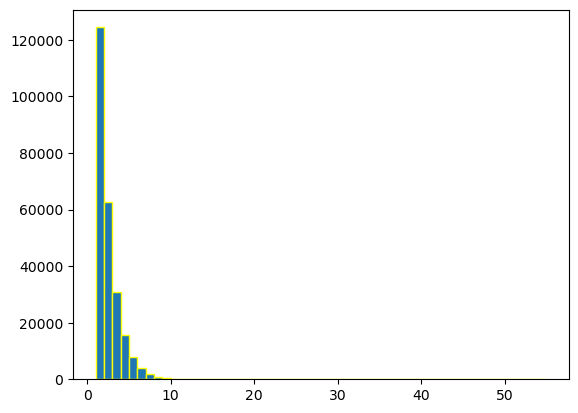

In [36]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(perfectmm_counted[0], edgecolor='yellow', bins=np.arange(1, 56, 1))
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
plt.show()

### Win Streaks

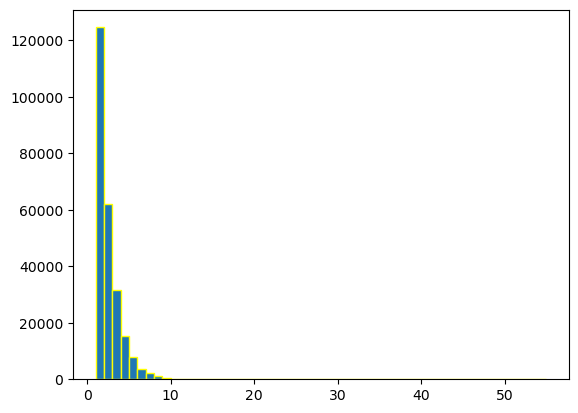

In [37]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(perfectmm_counted[1], edgecolor='yellow', bins=np.arange(1, 56, 1))
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
plt.show()

### Combined

In [38]:
streak_sizes_comb = []
frequencies_comb = []

streak_sizes_0 = sorted(list(perfect_dict_0.keys()))
streak_sizes_0 = list(np.arange(min(streak_sizes_0), max(streak_sizes_0)+1, 1))
frequencies_0 = [perfect_dict_0[x] for x in streak_sizes_0][::-1]

streak_sizes_0 = sorted([x*(-1) for x in streak_sizes_0])
# frequencies_0 = frequencies_0[::-1]

print(streak_sizes_0)
print(frequencies_0)

streak_sizes_1 = sorted(list(perfect_dict_1.keys()))
streak_sizes_1 = list(np.arange(min(streak_sizes_1), max(streak_sizes_1)+1, 1))
frequencies_1 = [perfect_dict_1[x] for x in streak_sizes_1]

print(streak_sizes_1)
print(frequencies_1)

streak_sizes_comb.extend(streak_sizes_0)
streak_sizes_comb.extend(streak_sizes_1)
frequencies_comb.extend(frequencies_0)
frequencies_comb.extend(frequencies_1)

print(streak_sizes_comb)
print(frequencies_comb)

[-17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]
[3, 4, 9, 24, 28, 55, 111, 248, 461, 979, 2003, 3955, 7940, 15672, 30936, 62676, 124404]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[124601, 62144, 31575, 15466, 7824, 3812, 2093, 1013, 523, 228, 104, 58, 39, 12, 6, 6, 2, 1, 0, 2]
[-17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[3, 4, 9, 24, 28, 55, 111, 248, 461, 979, 2003, 3955, 7940, 15672, 30936, 62676, 124404, 124601, 62144, 31575, 15466, 7824, 3812, 2093, 1013, 523, 228, 104, 58, 39, 12, 6, 6, 2, 1, 0, 2]


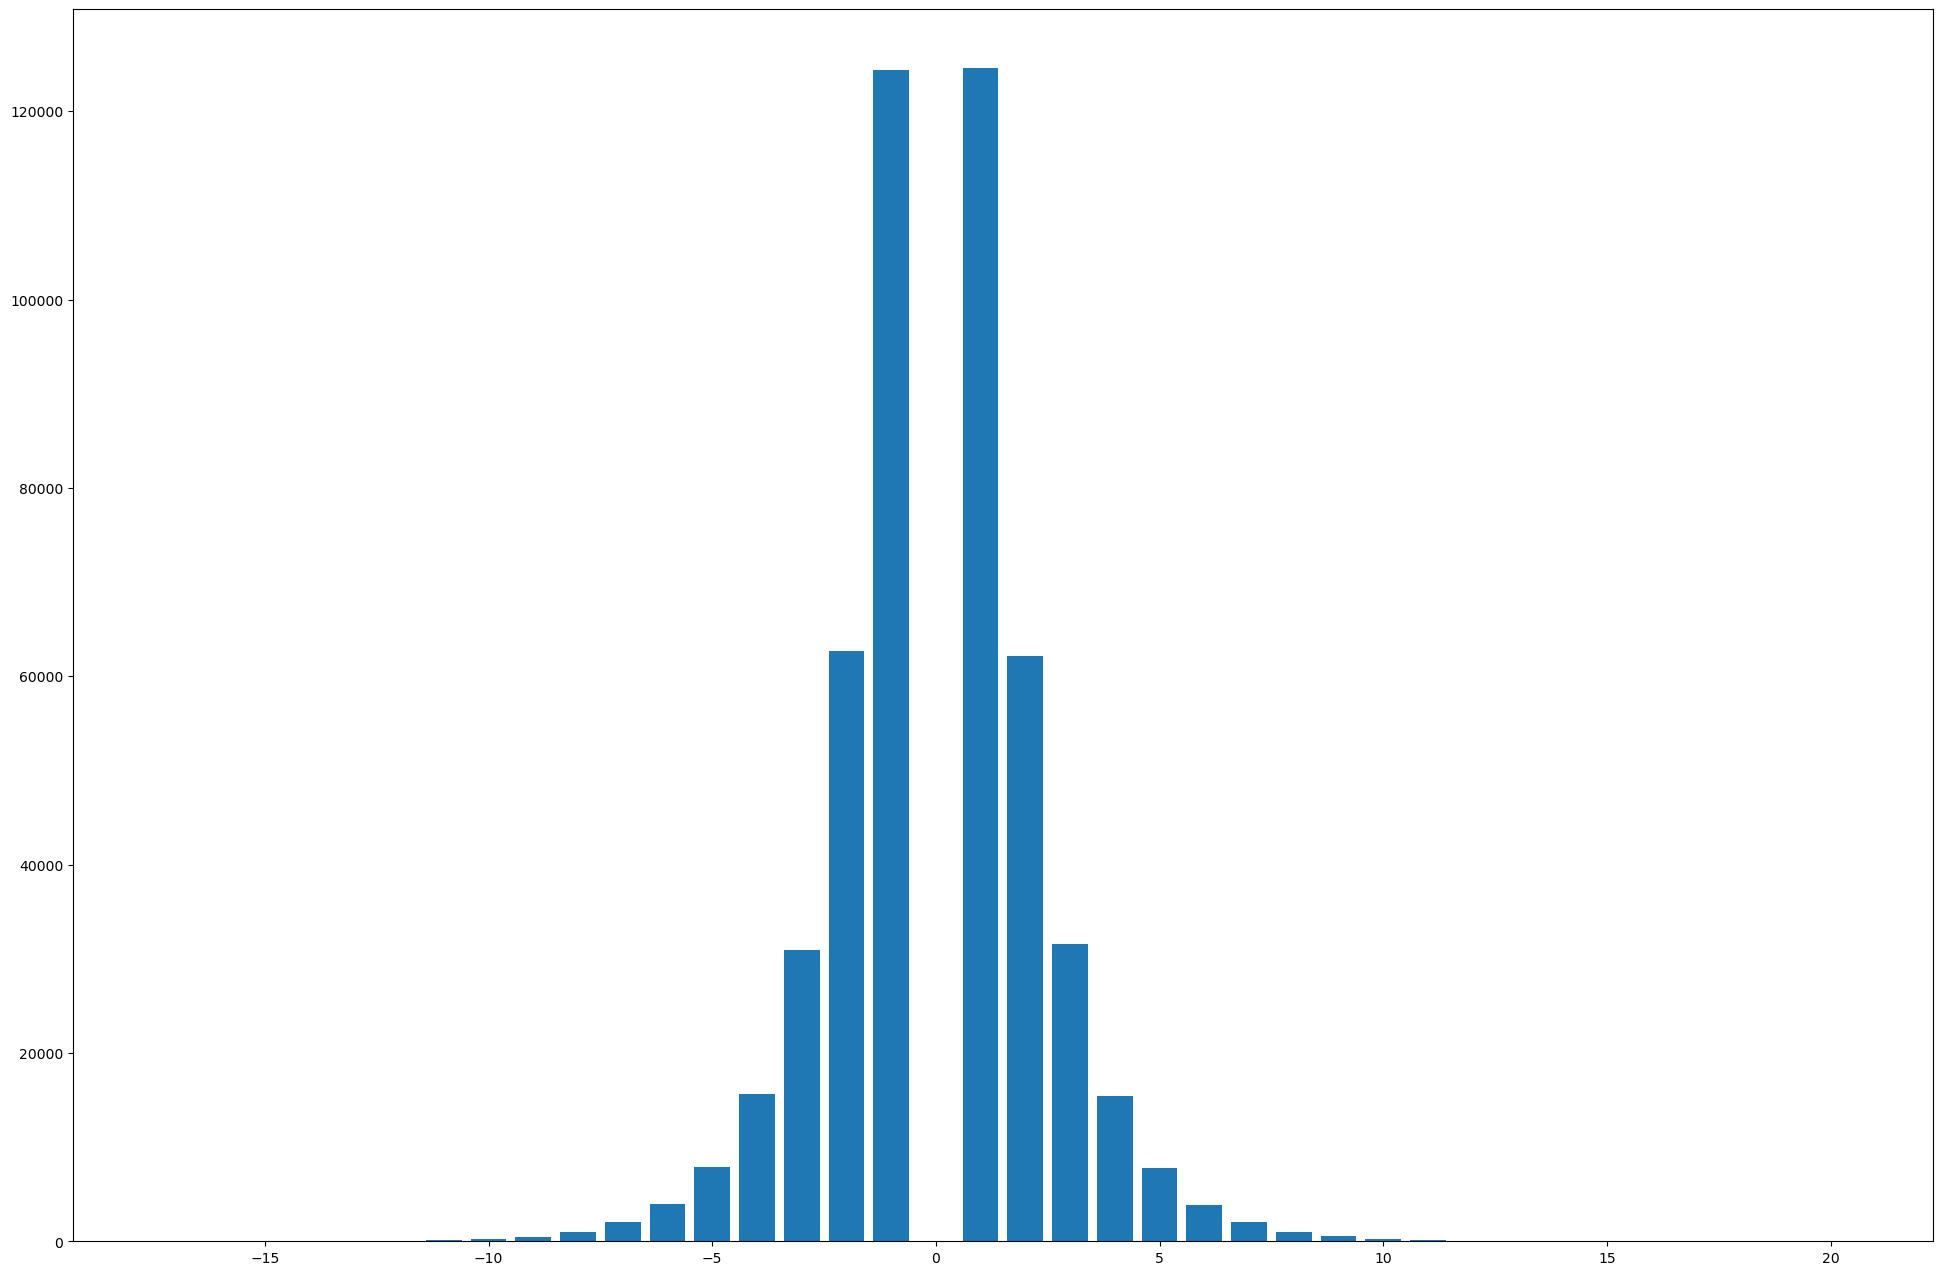

In [39]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes_comb, frequencies_comb)
# plt.xticks(np.arange(0, 55, 5))
# plt.xticks(np.arange(0, 25, 5))
# addlabels(streak_sizes_comb, frequencies_comb)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

In [40]:
streaks = []

streaks_0 = list(perfectmm_counted[0])
streaks_0 = [x*(-1) for x in streaks_0]
print(streaks_0[:20])

print(np.mean(streaks_0))
print(np.std(streaks_0))

streaks_1 = list(perfectmm_counted[1])
print(streaks_1[:20])

print(np.mean(streaks_1))
print(np.std(streaks_1))


print('----')
streaks.extend(streaks_0)
streaks.extend(streaks_1)

print(np.mean(streaks))
print(np.std(streaks))


perfectmm_streak_comb_avg = np.mean(streaks)
perfectmm_streak_comb_sd = np.std(streaks)

# llist.extend(list(perfectmm_counted[1]))
# print(len(llist))
# print(llist[:30])

# print(np.mean(llist))
# print(np.std(llist))
# print(np.sum(llist))

[-2, -1, -1, -5, -1, -3, -1, -1, -2, -2, -2, -1, -1, -2, -1, -1, -1, -1, -1, -4]
-2.003923721884669
1.4168229150676865
[1, 2, 2, 1, 3, 1, 3, 4, 2, 6, 1, 1, 2, 4, 1, 5, 5, 1, 1, 7]
2.0039557691305725
1.419380547217041
----
2.003939745539731e-05
2.4549518663543686


## NearPerfectMM

### Losing Streaks

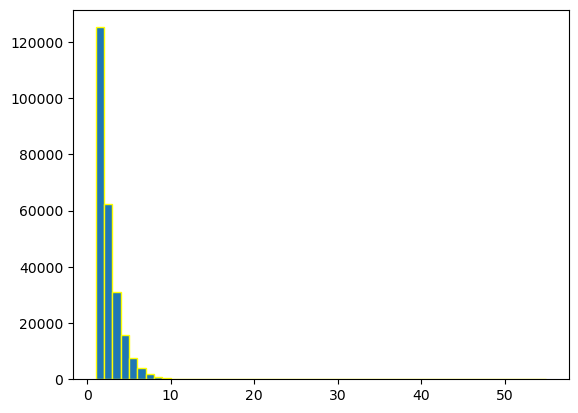

In [41]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(nearperfectmm_counted[0], edgecolor='yellow', bins=np.arange(1, 56, 1))
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
plt.show()

### Win Streaks

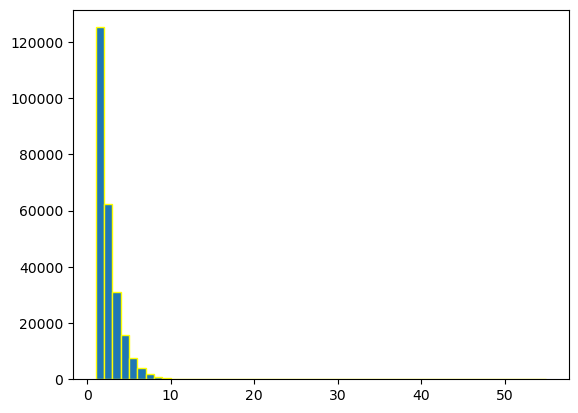

In [42]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(nearperfectmm_counted[0], edgecolor='yellow', bins=np.arange(1, 56, 1))
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
plt.show()

### Combined

In [43]:
streak_sizes_comb = []
frequencies_comb = []

streak_sizes_0 = sorted(list(nearperfect_dict_0.keys()))
streak_sizes_0 = list(np.arange(min(streak_sizes_0), max(streak_sizes_0)+1, 1))
frequencies_0 = [nearperfect_dict_0[x] for x in streak_sizes_0][::-1]

streak_sizes_0 = sorted([x*(-1) for x in streak_sizes_0])
# frequencies_0 = frequencies_0[::-1]

print(streak_sizes_0)
print(frequencies_0)

streak_sizes_1 = sorted(list(nearperfect_dict_1.keys()))
streak_sizes_1 = list(np.arange(min(streak_sizes_1), max(streak_sizes_1)+1, 1))
frequencies_1 = [nearperfect_dict_1[x] for x in streak_sizes_1]

print(streak_sizes_1)
print(frequencies_1)

streak_sizes_comb.extend(streak_sizes_0)
streak_sizes_comb.extend(streak_sizes_1)
frequencies_comb.extend(frequencies_0)
frequencies_comb.extend(frequencies_1)

print(streak_sizes_comb)
print(frequencies_comb)

[-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]
[1, 0, 0, 1, 4, 8, 10, 34, 77, 117, 254, 476, 961, 1916, 4078, 7717, 15849, 31120, 62204, 125225]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[125231, 62650, 30970, 15522, 7842, 3902, 1946, 1003, 493, 274, 107, 56, 21, 20, 8, 3, 1, 2, 0, 0, 0, 0, 1]
[-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[1, 0, 0, 1, 4, 8, 10, 34, 77, 117, 254, 476, 961, 1916, 4078, 7717, 15849, 31120, 62204, 125225, 125231, 62650, 30970, 15522, 7842, 3902, 1946, 1003, 493, 274, 107, 56, 21, 20, 8, 3, 1, 2, 0, 0, 0, 0, 1]


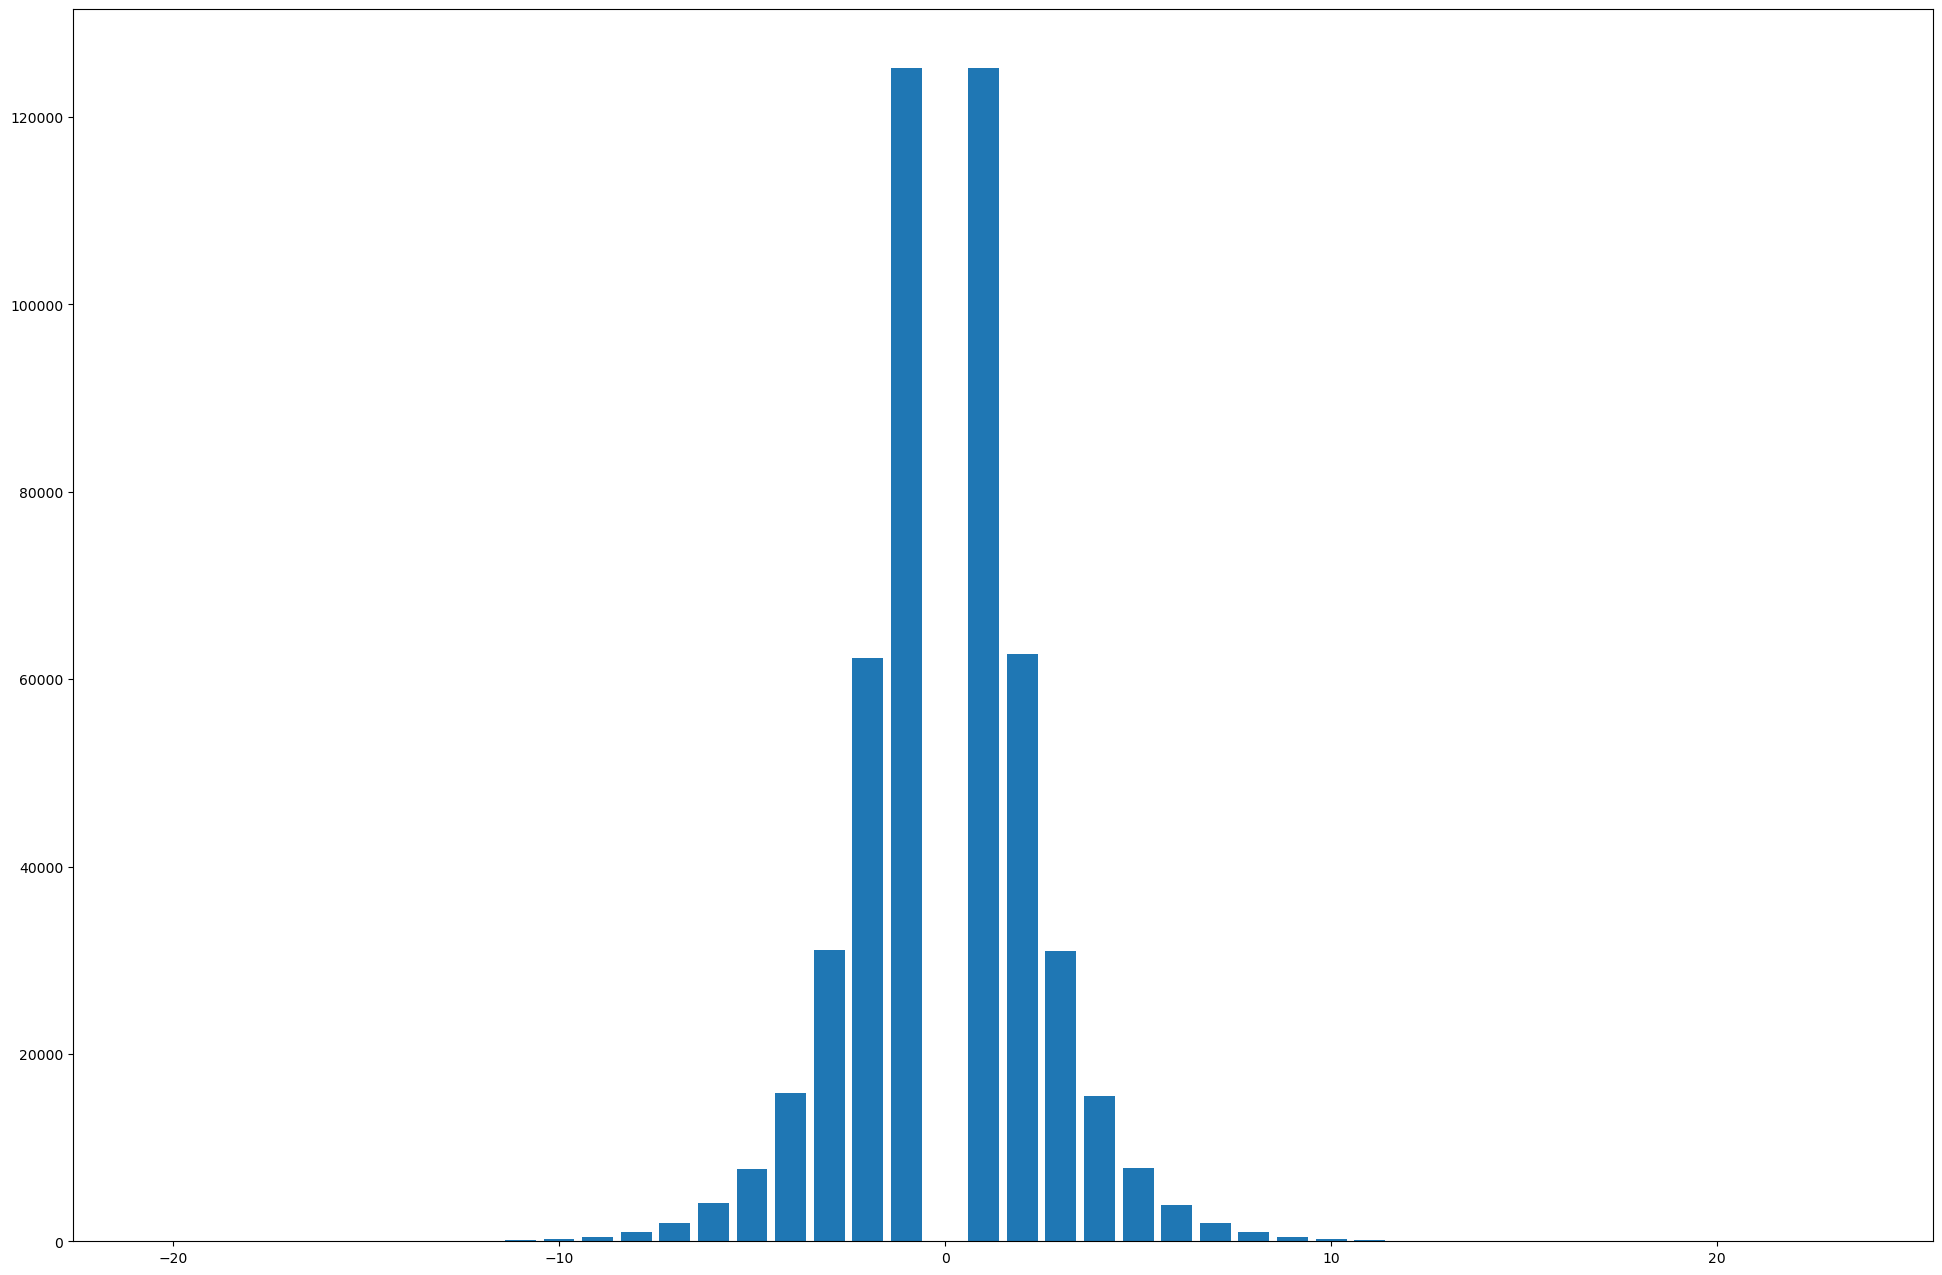

In [44]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes_comb, frequencies_comb)
# plt.xticks(np.arange(0, 55, 5))
# plt.xticks(np.arange(0, 25, 5))
# addlabels(streak_sizes_comb, frequencies_comb)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

In [45]:
streaks = []

streaks_0 = list(nearperfectmm_counted[0])
streaks_0 = [x*(-1) for x in streaks_0]
print(streaks_0[:20])

print(np.mean(streaks_0))
print(np.std(streaks_0))

streaks_1 = list(nearperfectmm_counted[1])
print(streaks_1[:20])

print(np.mean(streaks_1))
print(np.std(streaks_1))


print('----')
streaks.extend(streaks_0)
streaks.extend(streaks_1)

print(np.mean(streaks))
print(np.std(streaks))

nearperfectmm_streak_comb_avg = np.mean(streaks)
nearperfectmm_streak_comb_sd = np.std(streaks)


# llist.extend(list(perfectmm_counted[1]))
# print(len(llist))
# print(llist[:30])

# print(np.mean(llist))
# print(np.std(llist))
# print(np.sum(llist))

[-1, -1, -1, -3, -1, -2, -2, -2, -2, -2, -2, -1, -2, -1, -4, -1, -1, -3, -2, -1]
-2.0011037704157535
1.4167982423222778
[3, 2, 1, 2, 2, 2, 4, 1, 4, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1]
1.9980644026042582
1.4148511856294026
----
-0.0015196839057476045
2.450081036922303


## StreakMM

### Losing Streaks

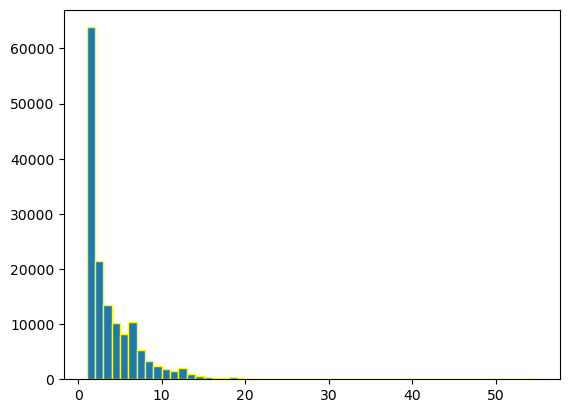

In [46]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(streakmm_counted[0], edgecolor='yellow', bins=np.arange(1, 56, 1))
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
plt.show()

### Win Streaks

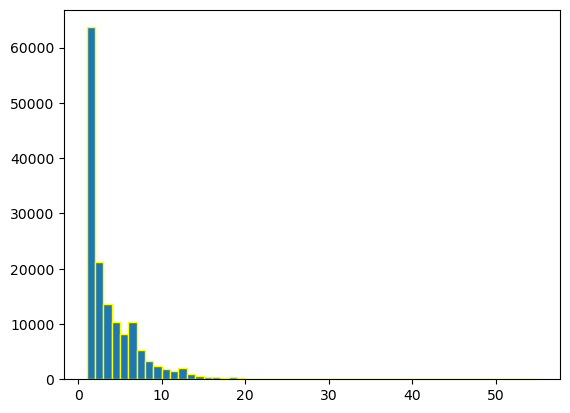

In [47]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(streakmm_counted[1], edgecolor='yellow', bins=np.arange(1, 56, 1))
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
plt.show()

### Combined

In [48]:
streak_sizes_comb = []
frequencies_comb = []

streak_sizes_0 = sorted(list(streak_dict_0.keys()))
streak_sizes_0 = list(np.arange(min(streak_sizes_0), max(streak_sizes_0)+1, 1))
frequencies_0 = [streak_dict_0[x] for x in streak_sizes_0][::-1]

streak_sizes_0 = sorted([x*(-1) for x in streak_sizes_0])
# frequencies_0 = frequencies_0[::-1]

print(streak_sizes_0)
print(frequencies_0)

streak_sizes_1 = sorted(list(streak_dict_1.keys()))
streak_sizes_1 = list(np.arange(min(streak_sizes_1), max(streak_sizes_1)+1, 1))
frequencies_1 = [streak_dict_1[x] for x in streak_sizes_1]

print(streak_sizes_1)
print(frequencies_1)

streak_sizes_comb.extend(streak_sizes_0)
streak_sizes_comb.extend(streak_sizes_1)
frequencies_comb.extend(frequencies_0)
frequencies_comb.extend(frequencies_1)

print(streak_sizes_comb)
print(frequencies_comb)

[-52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 7, 3, 6, 13, 14, 13, 15, 12, 37, 63, 56, 76, 82, 103, 205, 377, 300, 316, 467, 590, 981, 1995, 1586, 1896, 2420, 3398, 5306, 10454, 8198, 10201, 13441, 21473, 63848]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[63688, 21255, 13532, 10327, 8261, 10441, 5374, 3301, 2492, 1874, 1520, 1983, 1021, 644, 480, 358, 270, 392, 198, 128, 79, 77, 60, 71, 36, 30, 16, 6, 7, 10, 8, 4, 2, 5, 0, 5, 3, 1, 1]
[-52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -

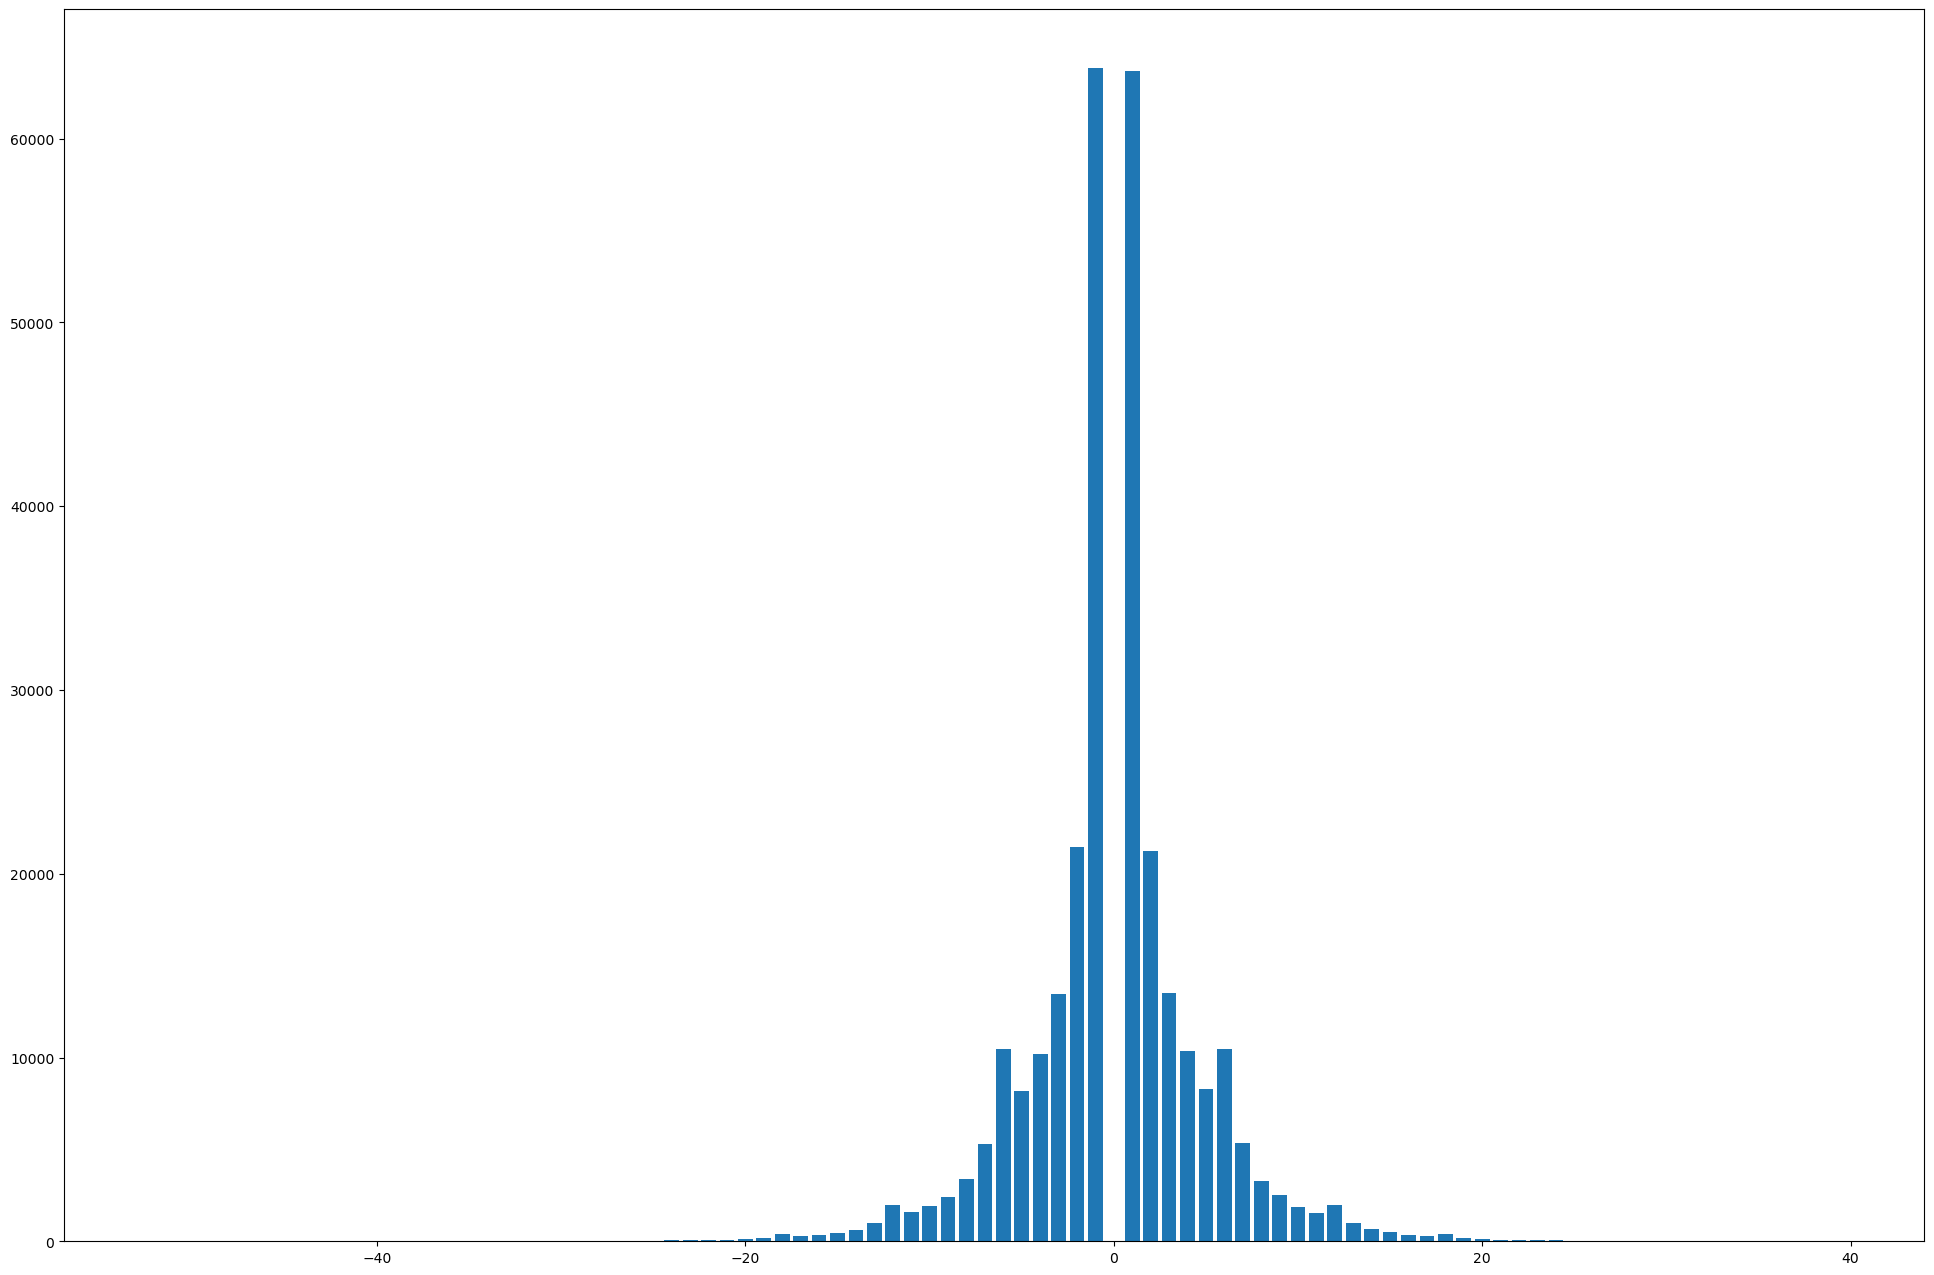

In [49]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes_comb, frequencies_comb)
# plt.xticks(np.arange(0, 55, 5))
# plt.xticks(np.arange(0, 25, 5))
# addlabels(streak_sizes_comb, frequencies_comb)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

In [50]:
streaks = []

streaks_0 = list(streakmm_counted[0])
streaks_0 = [x*(-1) for x in streaks_0]
print(streaks_0[:20])

print(np.mean(streaks_0))
print(np.std(streaks_0))

streaks_1 = list(streakmm_counted[1])
print(streaks_1[:20])

print(np.mean(streaks_1))
print(np.std(streaks_1))


print('----')
streaks.extend(streaks_0)
streaks.extend(streaks_1)

print(np.mean(streaks))
print(np.std(streaks))

streakmm_streak_comb_avg = np.mean(streaks)
streakmm_streak_comb_sd = np.std(streaks)


# llist.extend(list(perfectmm_counted[1]))
# print(len(llist))
# print(llist[:30])

# print(np.mean(llist))
# print(np.std(llist))
# print(np.sum(llist))

[-6, -3, -7, -1, -1, -5, -25, -1, -5, -6, -1, -2, -1, -1, -6, -7, -1, -3, -1, -1]
-3.3715100600834003
3.400960275967006
[1, 2, 4, 2, 2, 1, 4, 1, 1, 7, 4, 1, 1, 6, 5, 1, 1, 4, 3, 3]
3.3870505542038387
3.4216191520092782
----
0.007758827524913744
4.8017225415490215


## F-TEST (One tail)

### Avgs and SDs of MMS

In [51]:
print(perfectmm_streak_comb_avg)
print(perfectmm_streak_comb_sd)

print(nearperfectmm_streak_comb_avg)
print(nearperfectmm_streak_comb_sd)

print(streakmm_streak_comb_avg)
print(streakmm_streak_comb_sd)



2.003939745539731e-05
2.4549518663543686
-0.0015196839057476045
2.450081036922303
0.007758827524913744
4.8017225415490215


In [52]:
pop_mean = perfectmm_streak_comb_avg
pop_sd = perfectmm_streak_comb_sd

### PerfectMM vs NearPerfectMM

In [53]:
perfectmm_streak_comb_sd**2/nearperfectmm_streak_comb_sd**2

1.0039800080331769

### NearPerfectMM vs StreakMM

In [54]:
streakmm_streak_comb_sd**2/nearperfectmm_streak_comb_sd**2

3.840901989488378

### PerfectMM vs StreakMM

In [55]:
streakmm_streak_comb_sd**2/perfectmm_streak_comb_sd**2

3.825675769194653

All bigger than 1

https://statisticsbyjim.com/hypothesis-testing/f-table/

# Ch 7 - Who Plays a Million Games ?

## PerfectMM - 1000 players // 300 games per player (to compare against Population)

In [128]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### set random seed
random.seed(6565)
np.random.seed(6565)

prob_list = [0.5]

### when each game is between 49 ~ 51 % (independent)
#### 3000 games per player, 1000 players, totalling 3 million games played

avg_list_0 = []
avg_list_1 = []

perfect_all_records = []

number_of_players = 1000
games_per_player = 300


for _ in range(number_of_players):
    result_n = []

    for _ in range(games_per_player):
        prob_of_0 = random.choice(prob_list)
        prob_of_1 = 1 - prob_of_0

        one_game = np.random.choice([0,1], 1, p = [prob_of_0, prob_of_1])[0]
        result_n.append(one_game)
    
    streak_counter_result = streak_counter(result_n)
    
    ### add to perfect_all_records (3000 players)
    perfect_all_records.append(result_n)
    # print(streak_counter_result)

    avg_cal_result = avg_cal(streak_counter_result)
    # print(avg_cal_result)
    avg_list_0.append(avg_cal_result[0])
    avg_list_1.append(avg_cal_result[1])
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-04-07 16:25:39



----------------------------------------------------
done in 2.227s.
2024-04-07 16:25:41


In [129]:
# one_perfect = perfect_all_records[400]
# one_perfect = perfect_all_records[200]
one_perfect = perfect_all_records[600]
len(one_perfect)


300

## NearPerfectMM - 1000 players // 300 games per player (to compare against Population)

In [130]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### set random seed
random.seed(2237)
np.random.seed(2237)

prob_list = np.linspace(0.49,0.51, 100)

### when each game is between 49 ~ 51 % (independent)
#### 3000 games per player, 1000 players, totalling 3 million games played

avg_list_0 = []
avg_list_1 = []

nearperfect_all_records = []

number_of_players = 1000
games_per_player = 300


for _ in range(number_of_players):
    result_n = []

    for _ in range(games_per_player):
        prob_of_0 = random.choice(prob_list)
        prob_of_1 = 1 - prob_of_0

        one_game = np.random.choice([0,1], 1, p = [prob_of_0, prob_of_1])[0]
        result_n.append(one_game)
    
    streak_counter_result = streak_counter(result_n)
    
    ### add to nearperfect_all_records (3000 players)
    nearperfect_all_records.append(result_n)
    # print(streak_counter_result)

    avg_cal_result = avg_cal(streak_counter_result)
    # print(avg_cal_result)
    avg_list_0.append(avg_cal_result[0])
    avg_list_1.append(avg_cal_result[1])
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-04-07 16:25:52



----------------------------------------------------
done in 2.621s.
2024-04-07 16:25:55


In [131]:
one_nearperfect = nearperfect_all_records[400]
len(one_nearperfect)

300

## StreakMM - 1000 players // 300 games per player (to compare against Population)

In [60]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### set random seed
random.seed(3331)
np.random.seed(3331)

### when streaks exist
### ws:ls = 50:50
### 85% of win/loss depending on the streak

avg_list_0 = []
avg_list_1 = []

streak_all_records = []
for _ in range(1000):
    result_n = streak_gen(6, 300)     # 3000 games played per player
    
    # streak_all_records.append(pd.Series(result_n))
    streak_all_records.append(result_n)
    
    streak_counter_result = streak_counter(result_n)
    # print(streak_counter_result)

    avg_cal_result = avg_cal(streak_counter_result)
    # print(avg_cal_result)
    avg_list_0.append(avg_cal_result[0])
    avg_list_1.append(avg_cal_result[1])
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-04-02 15:27:36



----------------------------------------------------
done in 0.096s.
2024-04-02 15:27:36


In [61]:
one_streakmm = streak_all_records[400]
len(one_streakmm)

300

## *SET WINDOW SIZE

In [62]:
window_size = 50
# window_size = 100
# window_size = 300

## PerfectMM vs Population

### Single PerfectMM vs Population

In [111]:
llen = len(one_perfect)

f_critical_count = 0
z_critical_count = 0

print(f'pop_mean : {pop_mean}')
print(f'pop_sd : {pop_sd}')

for i in range(llen-window_size+1):
    # print(i , i+50)
    one_window = one_perfect[i:i+window_size]
    
    streak_counter_result = streak_counter(one_window)
    lose_streak = streak_counter_result[0]
    win_streak = streak_counter_result[1]
    
    ### ls = lose streak // ws = win streak
    ### means within one window (50 games)
    ls_mean = np.mean(lose_streak)
    ws_mean = np.mean(win_streak)
    
    ### standard deviations within one window (50 games)
    ls_sd = np.std(lose_streak)
    ws_sd = np.std(win_streak)
    
    
    print(f'L streak mean : {ls_mean}')
    print(f'W streak mean : {ws_mean}')
    print(f'W streak sd : {ls_sd}')
    print(f'W streak sd : {ws_sd}')
    
    streaks = []

    streaks_0 = list(lose_streak)
    streaks_0 = [x*(-1) for x in streaks_0]
    # print(streaks_0[:20])

    streaks_1 = list(win_streak)

    streaks.extend(streaks_0)
    streaks.extend(streaks_1)
    
    
    streak_mean = np.mean(streaks)
    streak_sd = np.std(streaks)
    # f_val = max(streak_sd, pop_sd)**2/min(streak_sd, pop_sd)**2
    f_val = streak_sd**2/pop_sd**2
    # if f_val > 1.36:
    if f_val > 1.5325:
        f_critical_count += 1
        
        
    z_val = (streak_mean - pop_mean) / (pop_sd/np.sqrt(len(streaks)))
    if abs(z_val) >= 1.96:
        z_critical_count += 1
    
    
    print(f'Streak mean : {streak_mean}')
    print(f'Streak sd : {streak_sd}')
    print(f'F-value : {f_val}')
    print(f'Z-value : {z_val}')

    print('-------------')



    # llist.extend(list(perfectmm_counted[1]))
    # print(len(llist))
    # print(llist[:30])

    # print(np.mean(llist))
    # print(np.std(llist))
    # print(np.sum(llist))
    
print(f_critical_count)
print(z_critical_count)
print(i+1)

pop_mean : 2.003939745539731e-05
pop_sd : 2.4549518663543686
L streak mean : 2.2
W streak mean : 2.5454545454545454
W streak sd : 1.5362291495737217
W streak sd : 2.3496087242400154
Streak mean : 0.2857142857142857
Streak sd : 3.1036515689143473
F-value : 1.598306095480039
Z-value : 0.533295795857877
-------------
L streak mean : 2.090909090909091
W streak mean : 2.7
W streak sd : 1.504813214295168
W streak sd : 2.4103941586387903
Streak mean : 0.19047619047619047
Streak sd : 3.110949137344967
F-value : 1.6058310770971769
Z-value : 0.35551806161655486
-------------
L streak mean : 2.090909090909091
W streak mean : 2.7
W streak sd : 1.504813214295168
W streak sd : 2.4103941586387903
Streak mean : 0.19047619047619047
Streak sd : 3.110949137344967
F-value : 1.6058310770971769
Z-value : 0.35551806161655486
-------------
L streak mean : 2.2
W streak mean : 2.5454545454545454
W streak sd : 1.5362291495737217
W streak sd : 2.3496087242400154
Streak mean : 0.2857142857142857
Streak sd : 3.1036

### Critical Counts for all PerfectMM Records

In [112]:
f_crit_count_list = []

for item in perfect_all_records:
    one_record = item

    llen = len(one_record)

    f_critical_count = 0


    for i in range(llen-window_size+1):
        # print(i , i+50)
        one_window = one_record[i:i+window_size]

        streak_counter_result = streak_counter(one_window)
        lose_streak = streak_counter_result[0]
        win_streak = streak_counter_result[1]

        ### ls = lose streak // ws = win streak
        ### means within one window (50 games)
        ls_mean = np.mean(lose_streak)
        ws_mean = np.mean(win_streak)

        ### standard deviations within one window (50 games)
        ls_sd = np.std(lose_streak)
        ws_sd = np.std(win_streak)
        
        streaks = []

        streaks_0 = list(lose_streak)
        streaks_0 = [x*(-1) for x in streaks_0]
        # print(streaks_0[:20])

        streaks_1 = list(win_streak)

        streaks.extend(streaks_0)
        streaks.extend(streaks_1)
        
        streak_mean = np.mean(streaks)
        streak_sd = np.std(streaks)
        # f_val = max(streak_sd, pop_sd)**2/min(streak_sd, pop_sd)**2
        f_val = streak_sd**2/pop_sd**2
        # if f_val > 1.36:
        if f_val > 1.5325:
            f_critical_count += 1

    f_crit_count_list.append(f_critical_count)
#     # print(f'critical_count : {critical_count}')
    
# # print(crit_count_list)

In [113]:
print(np.mean(f_crit_count_list))
print(np.std(f_crit_count_list))
print(scipy.stats.skew(f_crit_count_list, axis=0, bias=True))

### 20.122
### 22.718343161419146
### 1.137660848861902

20.122
22.718343161419146
1.137660848861902


In [114]:
print(max(f_crit_count_list))
print(min(f_crit_count_list))

105
0


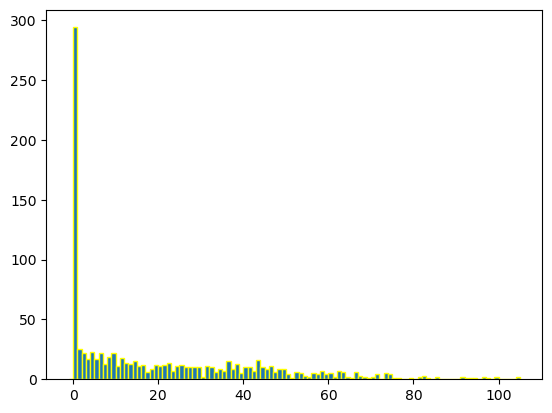

In [115]:
# plt.hist(perfectmm_counted[0], bins=30)
# plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(1, 300, 1))
# plt.hist(f_crit_count_list, edgecolor='yellow')
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)

plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(min(f_crit_count_list)-1, max(f_crit_count_list)+1, 1))

plt.show()

In [94]:
# # plt.hist(perfectmm_counted[0], bins=30)
# plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(1, 56, 1))
# # plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
# plt.show()

In [116]:
f_crit_count_list[:100]

[12,
 0,
 0,
 0,
 9,
 56,
 61,
 44,
 56,
 0,
 0,
 48,
 0,
 47,
 59,
 0,
 29,
 0,
 52,
 24,
 0,
 0,
 13,
 71,
 28,
 0,
 1,
 11,
 9,
 50,
 47,
 46,
 39,
 0,
 20,
 5,
 21,
 47,
 37,
 7,
 59,
 45,
 0,
 41,
 0,
 38,
 62,
 0,
 29,
 9,
 7,
 19,
 46,
 25,
 1,
 66,
 13,
 36,
 0,
 0,
 38,
 6,
 0,
 0,
 0,
 4,
 12,
 8,
 42,
 12,
 0,
 49,
 50,
 0,
 0,
 2,
 0,
 0,
 0,
 28,
 14,
 63,
 8,
 1,
 2,
 19,
 3,
 12,
 50,
 29,
 14,
 1,
 0,
 0,
 0,
 0,
 20,
 31,
 11,
 0]

## NearPerfctMM vs Population

### Single NearPerfectMM vs Population

In [69]:
llen = len(one_nearperfect)

critical_count = 0

print(f'pop_mean : {pop_mean}')
print(f'pop_sd : {pop_sd}')

for i in range(llen-window_size+1):
    # print(i , i+50)
    one_window = one_nearperfect[i:i+window_size]
    
    streak_counter_result = streak_counter(one_window)
    lose_streak = streak_counter_result[0]
    win_streak = streak_counter_result[1]
    
    ### ls = lose streak // ws = win streak
    ### means within one window (50 games)
    ls_mean = np.mean(lose_streak)
    ws_mean = np.mean(win_streak)
    
    ### standard deviations within one window (50 games)
    ls_sd = np.std(lose_streak)
    ws_sd = np.std(win_streak)
    
    
    print(f'L streak mean : {ls_mean}')
    print(f'W streak mean : {ws_mean}')
    print(f'W streak sd : {ls_sd}')
    print(f'W streak sd : {ws_sd}')
    
    streaks = []

    streaks_0 = list(lose_streak)
    streaks_0 = [x*(-1) for x in streaks_0]
    # print(streaks_0[:20])

    streaks_1 = list(win_streak)

    streaks.extend(streaks_0)
    streaks.extend(streaks_1)
    
    
    streak_mean = np.mean(streaks)
    streak_sd = np.std(streaks)
    # f_val = max(streak_sd, pop_sd)**2/min(streak_sd, pop_sd)**2
    f_val = streak_sd**2/pop_sd**2
    # if f_val > 1.35:
    if f_val > 1.5325:
        critical_count += 1
    
    print(f'Streak mean : {streak_mean}')
    print(f'Streak sd : {streak_sd}')
    print(f'F-value : {f_val}')

    print('-------------')


    # llist.extend(list(perfectmm_counted[1]))
    # print(len(llist))
    # print(llist[:30])

    # print(np.mean(llist))
    # print(np.std(llist))
    # print(np.sum(llist))
    
print(critical_count)

pop_mean : 2.003939745539731e-05
pop_sd : 2.4549518663543686
L streak mean : 3.7
W streak mean : 1.3
W streak sd : 3.4655446902326914
W streak sd : 0.45825756949558394
Streak mean : -1.2
Streak sd : 3.5156791662493894
F-value : 2.0508434399714637
-------------
L streak mean : 3.3636363636363638
W streak mean : 1.3
W streak sd : 3.4449627857266214
W streak sd : 0.45825756949558394
Streak mean : -1.1428571428571428
Streak sd : 3.426586727144004
F-value : 1.9482177406769403
-------------
L streak mean : 3.7
W streak mean : 1.3
W streak sd : 3.4655446902326914
W streak sd : 0.45825756949558394
Streak mean : -1.2
Streak sd : 3.5156791662493894
F-value : 2.0508434399714637
-------------
L streak mean : 3.7
W streak mean : 1.3
W streak sd : 3.4655446902326914
W streak sd : 0.45825756949558394
Streak mean : -1.2
Streak sd : 3.5156791662493894
F-value : 2.0508434399714637
-------------
L streak mean : 3.6
W streak mean : 1.4
W streak sd : 3.4117444218463966
W streak sd : 0.48989794855663565
Str

### Critical Counts for all NearPerfectMM Records

In [70]:
f_crit_count_list = []

for item in nearperfect_all_records:
    one_record = item

    llen = len(one_record)

    f_critical_count = 0


    for i in range(llen-window_size+1):
        # print(i , i+50)
        one_window = one_record[i:i+window_size]

        streak_counter_result = streak_counter(one_window)
        lose_streak = streak_counter_result[0]
        win_streak = streak_counter_result[1]

        ### ls = lose streak // ws = win streak
        ### means within one window (50 games)
        ls_mean = np.mean(lose_streak)
        ws_mean = np.mean(win_streak)

        ### standard deviations within one window (50 games)
        ls_sd = np.std(lose_streak)
        ws_sd = np.std(win_streak)
        
        streaks = []

        streaks_0 = list(lose_streak)
        streaks_0 = [x*(-1) for x in streaks_0]
        # print(streaks_0[:20])

        streaks_1 = list(win_streak)

        streaks.extend(streaks_0)
        streaks.extend(streaks_1)
        
        streak_mean = np.mean(streaks)
        streak_sd = np.std(streaks)
        # f_val = max(streak_sd, pop_sd)**2/min(streak_sd, pop_sd)**2
        f_val = streak_sd**2/pop_sd**2
        # if f_val > 1.36:
        if f_val > 1.5325:
            f_critical_count += 1

    f_crit_count_list.append(f_critical_count)
#     # print(f'critical_count : {critical_count}')
    
# # print(crit_count_list)

In [71]:
print(np.mean(f_crit_count_list))
print(np.std(f_crit_count_list))
print(scipy.stats.skew(f_crit_count_list, axis=0, bias=True))

### 18.958
### 22.30655141432669
### 1.2246984836455508

18.958
22.30655141432669
1.2246984836455508


In [72]:
print(max(f_crit_count_list))
print(min(f_crit_count_list))

118
0


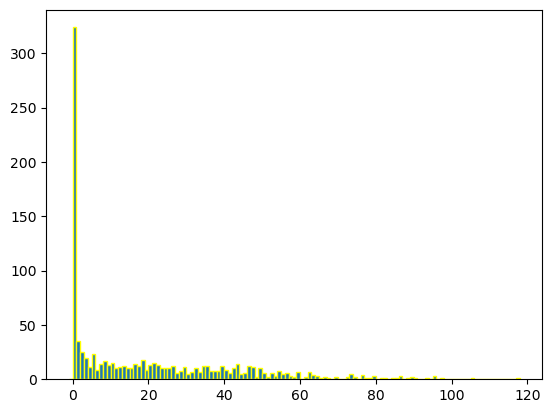

In [73]:
# plt.hist(perfectmm_counted[0], bins=30)
# plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(1, 300, 1))
# plt.hist(f_crit_count_list, edgecolor='yellow')
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)

plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(min(f_crit_count_list)-1, max(f_crit_count_list)+1, 1))

plt.show()

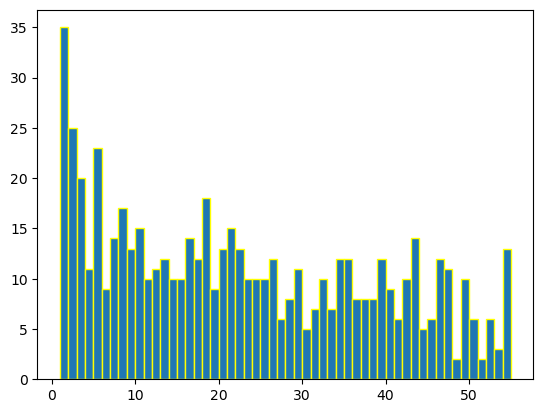

In [74]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(1, 56, 1))
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
plt.show()

## StreakMM vs Population

### Single StreakMM vs Population

In [75]:
llen = len(one_streakmm)

critical_count = 0

print(f'pop_mean : {pop_mean}')
print(f'pop_sd : {pop_sd}')

for i in range(llen-window_size+1):
    # print(i , i+50)
    one_window = one_streakmm[i:i+window_size]
    
    streak_counter_result = streak_counter(one_window)
    lose_streak = streak_counter_result[0]
    win_streak = streak_counter_result[1]
    
    ### ls = lose streak // ws = win streak
    ### means within one window (50 games)
    ls_mean = np.mean(lose_streak)
    ws_mean = np.mean(win_streak)
    
    ### standard deviations within one window (50 games)
    ls_sd = np.std(lose_streak)
    ws_sd = np.std(win_streak)
    
    
    print(f'L streak mean : {ls_mean}')
    print(f'W streak mean : {ws_mean}')
    print(f'W streak sd : {ls_sd}')
    print(f'W streak sd : {ws_sd}')
    
    streaks = []

    streaks_0 = list(lose_streak)
    streaks_0 = [x*(-1) for x in streaks_0]
    # print(streaks_0[:20])

    streaks_1 = list(win_streak)

    streaks.extend(streaks_0)
    streaks.extend(streaks_1)
    
    
    streak_mean = np.mean(streaks)
    streak_sd = np.std(streaks)
    # f_val = max(streak_sd, pop_sd)**2/min(streak_sd, pop_sd)**2
    f_val = streak_sd**2/pop_sd**2
    # if f_val > 1.35:
    if f_val > 1.5325:
        critical_count += 1
    
    print(f'Streak mean : {streak_mean}')
    print(f'Streak sd : {streak_sd}')
    print(f'F-value : {f_val}')

    print('-------------')


    # llist.extend(list(perfectmm_counted[1]))
    # print(len(llist))
    # print(llist[:30])

    # print(np.mean(llist))
    # print(np.std(llist))
    # print(np.sum(llist))
    
print(critical_count)

pop_mean : 2.003939745539731e-05
pop_sd : 2.4549518663543686
L streak mean : 3.625
W streak mean : 2.3333333333333335
W streak sd : 3.5333235062756425
W streak sd : 1.632993161855452
Streak mean : -0.47058823529411764
Streak sd : 4.0164023564968385
F-value : 2.6766307536161307
-------------
L streak mean : 3.3333333333333335
W streak mean : 2.2222222222222223
W streak sd : 3.431876713662333
W streak sd : 1.547598697464902
Streak mean : -0.5555555555555556
Streak sd : 3.84739770959573
F-value : 2.456112194380304
-------------
L streak mean : 3.3333333333333335
W streak mean : 2.0
W streak sd : 3.431876713662333
W streak sd : 1.4832396974191326
Streak mean : -0.5263157894736842
Streak sd : 3.7186361542433035
F-value : 2.294464865740066
-------------
L streak mean : 3.3333333333333335
W streak mean : 2.0
W streak sd : 3.431876713662333
W streak sd : 1.4832396974191326
Streak mean : -0.5263157894736842
Streak sd : 3.7186361542433035
F-value : 2.294464865740066
-------------
L streak mean :

### Critical Counts for all StreakMM Records

In [133]:
f_crit_count_list = []

for item in streak_all_records:
    one_record = item

    llen = len(one_record)

    f_critical_count = 0


    for i in range(llen-window_size+1):
        # print(i , i+50)
        one_window = one_record[i:i+window_size]

        streak_counter_result = streak_counter(one_window)
        lose_streak = streak_counter_result[0]
        win_streak = streak_counter_result[1]

        ### ls = lose streak // ws = win streak
        ### means within one window (50 games)
        ls_mean = np.mean(lose_streak)
        ws_mean = np.mean(win_streak)

        ### standard deviations within one window (50 games)
        ls_sd = np.std(lose_streak)
        ws_sd = np.std(win_streak)
        
        streaks = []

        streaks_0 = list(lose_streak)
        streaks_0 = [x*(-1) for x in streaks_0]
        # print(streaks_0[:20])

        streaks_1 = list(win_streak)

        streaks.extend(streaks_0)
        streaks.extend(streaks_1)
        
        streak_mean = np.mean(streaks)
        streak_sd = np.std(streaks)
        # f_val = max(streak_sd, pop_sd)**2/min(streak_sd, pop_sd)**2
        f_val = streak_sd**2/pop_sd**2
        # if f_val > 1.36:
        if f_val > 1.5325:
            f_critical_count += 1

    f_crit_count_list.append(f_critical_count)
#     # print(f'critical_count : {critical_count}')
    
# # print(crit_count_list)

In [134]:
print(np.mean(f_crit_count_list))
print(np.std(f_crit_count_list))
print(scipy.stats.skew(f_crit_count_list, axis=0, bias=True))

### 232.661
### 21.759137827588663

232.661
21.759137827588663
-1.5786235618735802


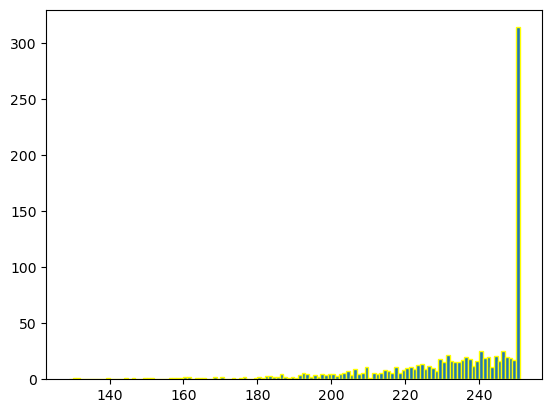

In [135]:
# plt.hist(perfectmm_counted[0], bins=30)
# plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(1, 300, 1))
# plt.hist(f_crit_count_list, edgecolor='yellow')
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)

plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(min(f_crit_count_list)-1, max(f_crit_count_list)+1, 1))

plt.show()

In [136]:
max(f_crit_count_list)

251

In [137]:
min(f_crit_count_list)

130

## Live Data vs Population

### Bronze parti 0

In [97]:
parent_data_folder = 'live_data/raw'

datafiles_list = glob.glob(f'{parent_data_folder}/bronze/partition_0/*.txt')
datafiles_list = datafiles_list[:]
print(datafiles_list[:10])


f_crit_count_list = []
for one_record_file in datafiles_list:
    with open(one_record_file, 'r') as datafile:
        one_record = datafile.read()
    
    one_record = ast.literal_eval(one_record)
    one_record = one_record[:300]
    
    
    ### critical count analysis
    llen = len(one_record)
    # print(f'len of one record : {llen}')
    if llen != 0 and llen == 300:
        # print(f'len of one record : {llen}')
        

        f_critical_count = 0
        for i in range(llen-window_size+1):

            one_window = one_record[i:i+window_size]

            streak_counter_result = streak_counter(one_window)
            lose_streak = streak_counter_result[0]
            win_streak = streak_counter_result[1]

            ### ls = lose streak // ws = win streak
            ### means within one window (50 games)
            ls_mean = np.mean(lose_streak)
            ws_mean = np.mean(win_streak)

            ### standard deviations within one window (50 games)
            ls_sd = np.std(lose_streak)
            ws_sd = np.std(win_streak)

            streaks = []

            streaks_0 = list(lose_streak)
            streaks_0 = [x*(-1) for x in streaks_0]
            # print(streaks_0[:20])

            streaks_1 = list(win_streak)

            streaks.extend(streaks_0)
            streaks.extend(streaks_1)

            streak_mean = np.mean(streaks)
            streak_sd = np.std(streaks)
            # f_val = max(streak_sd, pop_sd)**2/min(streak_sd, pop_sd)**2
            f_val = streak_sd**2/pop_sd**2
            # if f_val > 1.36:
            if f_val > 1.5325:
                f_critical_count += 1

        f_crit_count_list.append(f_critical_count)
        
    else:
        pass

        

['live_data/raw/bronze/partition_0/해적왕김단지.txt', 'live_data/raw/bronze/partition_0/성공은내손에.txt', 'live_data/raw/bronze/partition_0/무식하면폭발함.txt', 'live_data/raw/bronze/partition_0/liiiliilliiill.txt', 'live_data/raw/bronze/partition_0/기댈곳이없어.txt', 'live_data/raw/bronze/partition_0/노다.txt', 'live_data/raw/bronze/partition_0/날강두에서한반두.txt', 'live_data/raw/bronze/partition_0/숲이쌤.txt', 'live_data/raw/bronze/partition_0/pinkslayer.txt', 'live_data/raw/bronze/partition_0/asd50.txt']


In [98]:
print(f_crit_count_list)

[0, 15, 1, 10, 57, 70, 2, 35, 27, 29, 36, 43, 27, 29, 0, 2, 0, 1, 13, 26, 1, 2, 43, 55, 0, 0, 40, 19, 26, 7, 46, 103, 55, 44, 0, 48, 76, 13, 45, 0, 0, 22, 45, 14, 64, 4, 0, 19, 68, 30, 12, 25, 0, 16, 86, 0, 6, 40, 0, 0, 27, 60, 0, 61, 16, 0, 46, 15, 15, 44, 0, 45, 0, 47, 46, 2, 9, 16, 69, 30, 69, 8, 46, 0, 38, 56, 53, 55, 1, 9, 2, 56, 23, 34, 8, 0, 1, 0, 0, 48, 20, 18, 3, 35, 0, 32, 26, 3, 5, 0, 0, 1, 13, 2, 58, 0, 63, 97, 0, 14, 55, 51, 7, 8, 7, 17, 20, 11, 55, 7, 37, 41, 0, 25, 65, 35, 0, 14, 15, 3, 35, 0, 38, 9, 34, 13, 0, 11, 25, 0, 14, 36, 9, 0, 49, 0, 0, 77, 9, 119, 33, 8, 35, 59, 0, 3, 70, 0, 9, 64, 9, 63, 31, 4, 47, 27, 5, 2, 45, 28, 0, 1, 19, 0, 32, 30, 9, 0, 0, 0, 52, 4, 45, 0, 0, 20, 17, 53, 10, 20, 17, 9, 46, 0, 42, 43, 0, 0, 8, 2, 54, 8, 15, 5, 3, 48, 4, 48, 10, 12, 0, 0, 47, 9, 3, 3, 0, 0, 8, 48, 38, 9, 28, 66, 10, 58, 10, 85, 1, 10, 0, 0, 0, 121, 55, 26, 20, 46, 0, 20, 16, 34, 0, 62, 43, 0, 31, 16, 6, 28, 27, 62, 0, 129, 31, 0, 0, 16, 0, 0, 1, 31, 46, 46, 28, 19, 0, 0, 2

In [99]:
len(f_crit_count_list)

449

In [100]:
print(np.mean(f_crit_count_list))
print(np.std(f_crit_count_list))
print(scipy.stats.skew(f_crit_count_list, axis=0, bias=True))


### 24.06013363028953
### 25.66311542034426
### 1.2542563704868


#### PerfectMM vs Population
### 20.122
### 22.718343161419146
### 1.137660848861902


24.06013363028953
25.66311542034426
1.2542563704868


In [101]:
some_score = (24.06013363028953 - 20.122) / (22.718343161419146/np.sqrt(449))

print(some_score)

3.673135621625097


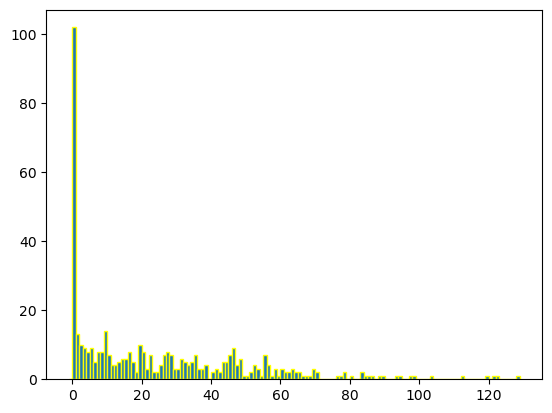

In [102]:
# plt.hist(perfectmm_counted[0], bins=30)
# plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(1, 300, 1))
# plt.hist(f_crit_count_list, edgecolor='yellow')
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)

plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(min(f_crit_count_list)-1, max(f_crit_count_list)+1, 1))

plt.show()

### Bronze parti 1

In [103]:
parent_data_folder = 'live_data/raw'

datafiles_list = glob.glob(f'{parent_data_folder}/bronze/partition_1/*.txt')
datafiles_list = datafiles_list[:]
print(datafiles_list[:10])


f_crit_count_list = []
for one_record_file in datafiles_list:
    with open(one_record_file, 'r') as datafile:
        one_record = datafile.read()
    
    one_record = ast.literal_eval(one_record)
    one_record = one_record[:300]
    
    
    ### critical count analysis
    llen = len(one_record)
    # print(f'len of one record : {llen}')
    if llen != 0 and llen == 300:
        # print(f'len of one record : {llen}')
        

        f_critical_count = 0
        for i in range(llen-window_size+1):

            one_window = one_record[i:i+window_size]

            streak_counter_result = streak_counter(one_window)
            lose_streak = streak_counter_result[0]
            win_streak = streak_counter_result[1]

            ### ls = lose streak // ws = win streak
            ### means within one window (50 games)
            ls_mean = np.mean(lose_streak)
            ws_mean = np.mean(win_streak)

            ### standard deviations within one window (50 games)
            ls_sd = np.std(lose_streak)
            ws_sd = np.std(win_streak)

            streaks = []

            streaks_0 = list(lose_streak)
            streaks_0 = [x*(-1) for x in streaks_0]
            # print(streaks_0[:20])

            streaks_1 = list(win_streak)

            streaks.extend(streaks_0)
            streaks.extend(streaks_1)

            streak_mean = np.mean(streaks)
            streak_sd = np.std(streaks)
            # f_val = max(streak_sd, pop_sd)**2/min(streak_sd, pop_sd)**2
            f_val = streak_sd**2/pop_sd**2
            # if f_val > 1.36:
            if f_val > 1.5325:
                f_critical_count += 1

        f_crit_count_list.append(f_critical_count)
        
    else:
        pass


['live_data/raw/bronze/partition_1/애좋사플러리짱.txt', 'live_data/raw/bronze/partition_1/한열나대기한마음.txt', 'live_data/raw/bronze/partition_1/박쫑.txt', 'live_data/raw/bronze/partition_1/입냄새스나이퍼.txt', 'live_data/raw/bronze/partition_1/hippoplaya.txt', 'live_data/raw/bronze/partition_1/밤꽃향버섯.txt', 'live_data/raw/bronze/partition_1/미성년자출입금지.txt', 'live_data/raw/bronze/partition_1/방구해요.txt', 'live_data/raw/bronze/partition_1/앵조님.txt', 'live_data/raw/bronze/partition_1/김주형님.txt']


In [104]:
print(f_crit_count_list)

[39, 0, 7, 2, 1, 38, 44, 37, 4, 41, 18, 8, 0, 61, 0, 44, 31, 1, 0, 0, 44, 28, 18, 0, 0, 0, 55, 0, 0, 25, 0, 23, 0, 22, 36, 3, 15, 2, 43, 90, 18, 57, 19, 0, 8, 3, 51, 0, 45, 1, 10, 37, 5, 29, 9, 38, 0, 0, 9, 25, 20, 3, 0, 6, 40, 17, 39, 0, 26, 1, 34, 16, 44, 43, 14, 87, 59, 0, 18, 0, 1, 4, 36, 26, 3, 0, 24, 0, 10, 80, 0, 0, 16, 13, 9, 1, 17, 28, 4, 38, 62, 14, 50, 15, 18, 5, 19, 10, 38, 2, 60, 7, 75, 12, 71, 0, 48, 0, 49, 0, 57, 0, 33, 23, 0, 17, 0, 56, 1, 204, 35, 5, 0, 21, 43, 0, 0, 0, 3, 46, 35, 0, 10, 0, 14, 0, 24, 0, 1, 39, 0, 14, 0, 3, 0, 21, 62, 16, 16, 35, 2, 24, 44, 13, 45, 26, 12, 75, 65, 0, 68, 11, 0, 3, 45, 31, 0, 0, 23, 17, 61, 56, 42, 78, 67, 59, 14, 0, 30, 0, 23, 0, 58, 1, 0, 1, 62, 6, 35, 6, 6, 22, 47, 0, 0, 1, 1, 28, 16, 0, 28, 44, 4, 0, 9, 8, 66, 15, 51, 71, 34, 0, 0, 59, 5, 45, 45, 0, 0, 31, 0, 0, 30, 0, 0, 60, 6, 8, 29, 5, 18, 0, 22, 12, 43, 15, 0, 0, 25, 9, 22, 46, 6, 54, 0, 91, 1, 3, 15, 0, 0, 38, 0, 14, 12, 2, 30, 0, 45, 4, 31, 88, 30, 12, 39, 10, 35, 0, 0, 21, 47

In [105]:
len(f_crit_count_list)

497

In [106]:
print(np.mean(f_crit_count_list))
print(np.std(f_crit_count_list))
print(scipy.stats.skew(f_crit_count_list, axis=0, bias=True))

### 22.321931589537222
### 25.24099101971418
### 1.6431936099030526

#### PerfectMM vs Population
### 20.122
### 22.718343161419146
### 1.137660848861902


22.321931589537222
25.24099101971418
1.6431936099030526


In [107]:
some_score = (22.321931589537222 - 20.122) / (22.718343161419146/np.sqrt(497))

print(some_score)

2.158791577547426


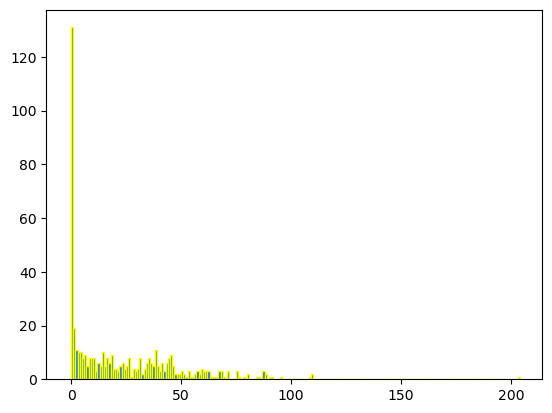

In [108]:
# plt.hist(perfectmm_counted[0], bins=30)
# plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(1, 300, 1))
# plt.hist(f_crit_count_list, edgecolor='yellow')
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)

plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(min(f_crit_count_list)-1, max(f_crit_count_list)+1, 1))

plt.show()

In [109]:
scipy.stats.skew(f_crit_count_list, axis=0, bias=True)

1.6431936099030526

In [110]:
min(f_crit_count_list)

0

### Diamond parti 1

In [121]:
parent_data_folder = 'live_data/raw'

datafiles_list = glob.glob(f'{parent_data_folder}/diamond/partition_0/*.txt')
datafiles_list = datafiles_list[:]
print(datafiles_list[:10])


f_crit_count_list = []
for one_record_file in datafiles_list:
    with open(one_record_file, 'r') as datafile:
        one_record = datafile.read()
    
    one_record = ast.literal_eval(one_record)
    one_record = one_record[:300]
    
    
    ### critical count analysis
    llen = len(one_record)
    # print(f'len of one record : {llen}')
    if llen != 0 and llen == 300:
        # print(f'len of one record : {llen}')
        

        f_critical_count = 0
        for i in range(llen-window_size+1):

            one_window = one_record[i:i+window_size]

            streak_counter_result = streak_counter(one_window)
            lose_streak = streak_counter_result[0]
            win_streak = streak_counter_result[1]

            ### ls = lose streak // ws = win streak
            ### means within one window (50 games)
            ls_mean = np.mean(lose_streak)
            ws_mean = np.mean(win_streak)

            ### standard deviations within one window (50 games)
            ls_sd = np.std(lose_streak)
            ws_sd = np.std(win_streak)

            streaks = []

            streaks_0 = list(lose_streak)
            streaks_0 = [x*(-1) for x in streaks_0]
            # print(streaks_0[:20])

            streaks_1 = list(win_streak)

            streaks.extend(streaks_0)
            streaks.extend(streaks_1)

            streak_mean = np.mean(streaks)
            streak_sd = np.std(streaks)
            # f_val = max(streak_sd, pop_sd)**2/min(streak_sd, pop_sd)**2
            f_val = streak_sd**2/pop_sd**2
            # if f_val > 1.36:
            if f_val > 1.5325:
                f_critical_count += 1

        f_crit_count_list.append(f_critical_count)
        
    else:
        pass

        

['live_data/raw/diamond/partition_0/우루쭝궈우슈찌부.txt', 'live_data/raw/diamond/partition_0/cmpeor.txt', 'live_data/raw/diamond/partition_0/평타질.txt', 'live_data/raw/diamond/partition_0/나무도령.txt', 'live_data/raw/diamond/partition_0/poach.txt', 'live_data/raw/diamond/partition_0/이비르.txt', 'live_data/raw/diamond/partition_0/ltrickshowl.txt', 'live_data/raw/diamond/partition_0/배불뚝이fan.txt', 'live_data/raw/diamond/partition_0/봉도.txt', 'live_data/raw/diamond/partition_0/니네랑자랭안함.txt']


In [122]:
print(f_crit_count_list)

[20, 41, 26, 11, 0, 6, 8, 4, 12, 33, 0, 36, 0, 0, 11, 12, 5, 0, 9, 34, 50, 46, 62, 32, 71, 5, 13, 0, 0, 0, 71, 13, 27, 92, 86, 51, 0, 43, 108, 12, 0, 0, 72, 8, 35, 20, 0, 45, 0, 13, 8, 27, 88, 2, 0, 25, 23, 18, 54, 0, 63, 52, 32, 0, 42, 28, 15, 54, 11, 29, 0, 70, 49, 26, 0, 9, 41, 0, 54, 28, 6, 1, 88, 44, 0, 29, 9, 16, 42, 15, 0, 27, 31, 0, 42, 6, 91, 9, 0, 46, 18, 0, 74, 19, 0, 10, 5, 9, 25, 79, 0, 18, 0, 15, 28, 39, 25, 31, 13, 0, 47, 39, 77, 6, 31, 0, 73, 0, 45, 31, 0, 28, 0, 11, 40, 30, 1, 0, 40, 17, 52, 25, 4, 28, 85, 9, 11, 26, 22, 6, 23, 11, 3, 1, 3, 10, 45, 1, 38, 30, 4, 75, 36, 0, 38, 0, 48, 0, 29, 11, 4, 9, 77, 21, 0, 0, 0, 13, 4, 1, 0, 33, 0, 96, 3, 0, 11, 61, 0, 15, 25, 0, 25, 35, 1, 48, 0, 45, 47, 0, 2, 71, 30, 0, 18, 20, 0, 30, 4, 11, 0, 11, 13, 11, 0, 5, 26, 53, 1, 106, 4, 13, 22, 0, 14, 31, 4, 0, 77, 65, 141, 102, 27, 52, 7, 0, 36, 58, 52, 29, 0, 21, 39, 28, 0, 42, 72, 20, 5, 55, 57, 26, 88, 0, 8, 2, 49, 5, 0, 0, 9, 47, 57, 46, 44, 24, 40, 39, 38, 0, 0, 73, 2, 67, 6, 37

In [123]:
len(f_crit_count_list)

660

In [124]:
print(np.mean(f_crit_count_list))
print(np.std(f_crit_count_list))
print(scipy.stats.skew(f_crit_count_list, axis=0, bias=True))


### 26.13030303030303
### 26.287247569052518
### 1.1064562437273329


#### PerfectMM vs Population
### 20.122
### 22.718343161419146
### 1.137660848861902


26.13030303030303
26.287247569052518
1.1064562437273329


In [127]:
(26.287247569052518)**2/22.718343161419146**2

1.3388654050454454

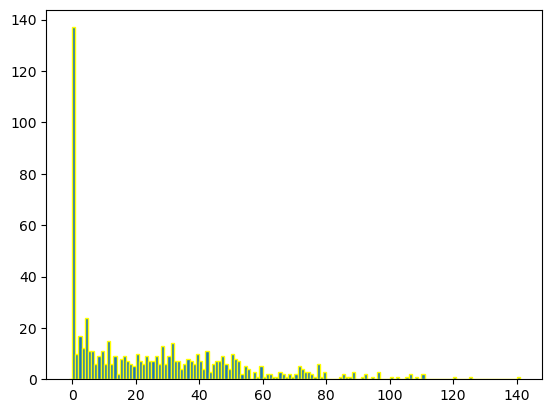

In [125]:
# plt.hist(perfectmm_counted[0], bins=30)
# plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(1, 300, 1))
# plt.hist(f_crit_count_list, edgecolor='yellow')
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)

plt.hist(f_crit_count_list, edgecolor='yellow', bins=np.arange(min(f_crit_count_list)-1, max(f_crit_count_list)+1, 1))

plt.show()

In [126]:
some_score = (26.13030303030303 - 20.122) / (22.718343161419146/np.sqrt(660))

print(some_score)

6.79433788625982
